# Régression Logistique

La régression logistique est un modèle de classification binaire utilisé pour estimer la probabilité qu'une observation appartienne à l'une des deux classes (par exemple, succès/échec, oui/non, 1/0). Elle repose sur la fonction logistique pour transformer une combinaison linéaire des variables explicatives en une probabilité comprise entre 0 et 1.

In [2]:
import pandas as pd

# Chargement des données (le fichier .csv est supposé disponible localement)
data = pd.read_csv('UCI_Credit_Card.csv')  # nom fictif du fichier
print(data.shape) 

(30000, 25)


In [3]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [4]:
# Regroupement des modalités rares avec une logique métier
data['EDUCATION'] = data['EDUCATION'].replace({5: 'Autres', 6: 'Autres', 0: 'Autres', 4: 'Autres'})

# Regroupement des statuts matrimoniaux
data['MARRIAGE'] = data['MARRIAGE'].replace({3: 'Autres', 0: 'Autres'})

# Regroupement des statuts de paiement
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_columns:
    data[col] = data[col].replace({-2: 'Paiement à temps', -1: 'Paiement à temps', 0: 'Paiement à temps',
                                    1: 'Retard', 2: 'Retard',
                                    3: 'Retard', 4: 'Retard', 5: 'Retard',
                                    6: 'Retard', 7: 'Retard', 8: 'Retard'})

In [5]:
# Transformation des données
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month']

for col in categorical_columns:
    data[col] = data[col].astype('category')

In [6]:
# Liste des variables à transformer en qualitatives
qualitative_columns = categorical_columns

In [ ]:
# Diviser en train et test
df = data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparation des variables explicatives et cible
X = df.drop(columns='default.payment.next.month')
y = df['default.payment.next.month']

from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test de manière stratifiée
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y #stratify pour obtenir un échantillon représentatif sur la variable défaut
)

In [ ]:
# Prétraitement des données
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

# Identification automatique des colonnes catégorielles
cat_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Convertir les colonnes catégoriques en type 'str' pour éviter les erreurs
X_train[cat_columns] = X_train[cat_columns].astype(str)
X_test[cat_columns] = X_test[cat_columns].astype(str)

# Transformer les variables catégorielles 
# discotisation des variables catégorielles
preprocessor = ColumnTransformer(  
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_columns)  # One-hot encoding pour les colonnes catégorielles
    ],
    remainder='passthrough'  # Laisser les autres colonnes inchangées
)


In [13]:
# Transformer les variables catégorielles avec OneHotEncoder et garder les autres variables inchangées
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
X_train_transformed

array([[1.000e+00, 1.000e+00, 0.000e+00, ..., 6.000e+03, 6.000e+03,
        5.500e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.846e+03,
        1.936e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.600e+03, 1.600e+03,
        1.600e+03],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+03, 1.200e+03,
        1.000e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [14]:
# Récupérer les noms des nouvelles colonnes créées par OneHotEncoder
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns)

# Fusionner avec les colonnes numériques originales
new_columns = list(onehot_columns) + list(X_train.select_dtypes(exclude=['object', 'category']).columns)

# Afficher les nouveaux noms de colonnes
new_columns


['SEX_2',
 'EDUCATION_2',
 'EDUCATION_3',
 'EDUCATION_Autres',
 'MARRIAGE_2',
 'MARRIAGE_Autres',
 'PAY_0_Retard',
 'PAY_2_Retard',
 'PAY_3_Retard',
 'PAY_4_Retard',
 'PAY_5_Retard',
 'PAY_6_Retard',
 'ID',
 'LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [15]:
# Convertir en DataFrame avec les nouveaux noms de colonnes
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=new_columns, index=X_train.index)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=new_columns, index=X_test.index)

# Afficher les premières lignes du DataFrame transformé
X_train_transformed_df.head()

,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_Autres,MARRIAGE_2,MARRIAGE_Autres,PAY_0_Retard,PAY_2_Retard,PAY_3_Retard,PAY_4_Retard,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
11018,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,155404.0,153234.0,156731.0,155818.0,6000.0,6000.0,5600.0,6000.0,6000.0,5500.0
1710,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,42283.0,51539.0,50583.0,52588.0,5000.0,10000.0,10000.0,0.0,2846.0,1936.0
4618,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,64277.0,45455.0,42231.0,42804.0,3300.0,2500.0,1556.0,1600.0,1600.0,1600.0
5482,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,780.0,0.0,0.0,0.0,1006.0,780.0,0.0,0.0,0.0,0.0
26187,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0


# Régression logistique avec statmodels

In [16]:
import statsmodels.api as sm
# Ajouter une constante pour l'interception
X_train_model = sm.add_constant(X_train_transformed_df)
X_train_model

,const,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_Autres,MARRIAGE_2,MARRIAGE_Autres,PAY_0_Retard,PAY_2_Retard,PAY_3_Retard,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
11018,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,155404.0,153234.0,156731.0,155818.0,6000.0,6000.0,5600.0,6000.0,6000.0,5500.0
1710,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,42283.0,51539.0,50583.0,52588.0,5000.0,10000.0,10000.0,0.0,2846.0,1936.0
4618,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,64277.0,45455.0,42231.0,42804.0,3300.0,2500.0,1556.0,1600.0,1600.0,1600.0
5482,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,780.0,0.0,0.0,0.0,1006.0,780.0,0.0,0.0,0.0,0.0
26187,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25780,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13921,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,115515.0,113948.0,122127.0,121962.0,4200.0,4100.0,4100.0,10000.0,4560.0,0.0
3794,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,67187.0,49924.0,33188.0,19826.0,3700.0,2023.0,2016.0,2000.0,1200.0,1000.0
27565,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,860.0,246.0,-46.0,-46.0,0.0,860.0,246.0,0.0,0.0,0.0


In [17]:
import statsmodels.api as sm
# Ajouter une constante pour l'interception
X_train_model = sm.add_constant(X_train_transformed_df)
X_train_model

,const,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_Autres,MARRIAGE_2,MARRIAGE_Autres,PAY_0_Retard,PAY_2_Retard,PAY_3_Retard,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
11018,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,155404.0,153234.0,156731.0,155818.0,6000.0,6000.0,5600.0,6000.0,6000.0,5500.0
1710,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,42283.0,51539.0,50583.0,52588.0,5000.0,10000.0,10000.0,0.0,2846.0,1936.0
4618,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,64277.0,45455.0,42231.0,42804.0,3300.0,2500.0,1556.0,1600.0,1600.0,1600.0
5482,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,780.0,0.0,0.0,0.0,1006.0,780.0,0.0,0.0,0.0,0.0
26187,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25780,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13921,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,115515.0,113948.0,122127.0,121962.0,4200.0,4100.0,4100.0,10000.0,4560.0,0.0
3794,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,67187.0,49924.0,33188.0,19826.0,3700.0,2023.0,2016.0,2000.0,1200.0,1000.0
27565,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,860.0,246.0,-46.0,-46.0,0.0,860.0,246.0,0.0,0.0,0.0


In [18]:
# Créer le modèle de régression logistique
logit_model = sm.Logit(y_train, X_train_model)

In [19]:
# Ajuster le modèle aux données d'apprentissage
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.444677
         Iterations 7


In [20]:
# Afficher le résumé des résultats de la régression
print(result.summary())

                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                21000
Model:                                  Logit   Df Residuals:                    20972
Method:                                   MLE   Df Model:                           27
Date:                        Thu, 18 Dec 2025   Pseudo R-squ.:                  0.1585
Time:                                22:00:59   Log-Likelihood:                -9338.2
converged:                               True   LL-Null:                       -11097.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.4659      0.113    -12.976      0.000      -1.687      -1.244
SEX_2               -0.1301      0.038     -3.433

p-value<5% donc le modèle est globalement significatif cela veut dire que les variables choisies permettent de prédire le niveau de PD. 
Le R-carré de McFadden sur la Régression Linéaire, autant sur la Régression Logistique ce n'est pas très intéressant.
On peut aussi regarder le signe des coefficients. Par exemple: coef = 1,31 à PAY_0_Retard, signifie que lorsqu'il y'a un retard de paiement les chances de faire un défaut augmente.
Les coefficient négatifs peuvent être dus à des problèmes de seuils 
Lorsque aussi la p_valeur P>|z| est inférieur à 5%, la variable est statistiquement significatif. 

1. Test global (Likelihood Ratio Test)

LLR p-value = 0.000 < 5 %

⇒ le modèle est globalement significatif

Cela signifie que l’ensemble des variables explicatives améliore significativement la prédiction du défaut par rapport à un modèle sans variables (modèle nul).

Le test du rapport de vraisemblance indique que le modèle est globalement significatif, ce qui signifie que les variables sélectionnées apportent une information pertinente pour la prédiction du défaut.

2. McFadden R² entre 0.1 et 0.3 → bon modèle logistique

0.4 → excellent (rare)

Donc ici : 0.1585 = niveau de performance satisfaisant

Le pseudo R² de McFadden indique une qualité d’ajustement satisfaisante pour un modèle de régression logistique appliqué à des données de risque de crédit.

3. Coefficient

| Variable                        | Coefficient | Interprétation             |
| ------------------------------- | ----------- | -------------------------- |
| `PAY_0_Retard`                  | **+1.317**  | Effet très fort et positif |
| `PAY_2_Retard` à `PAY_6_Retard` | positifs    | Augmentation du risque     |

Un coefficient positif signifie :

augmentation du log-odds de défaut

donc augmentation de la probabilité de défaut

Donc, un retard de paiement récent est le facteur explicatif le plus déterminant du risque de défaut, ce qui est cohérent avec la littérature sur le risque de crédit.

4. LIMIT_BAL

Coefficient négatif et significatif

⇒ plus la limite de crédit est élevée, moins le risque de défaut est important

Les clients disposant d’une limite de crédit plus élevée présentent un profil de risque plus faible, ce qui peut refléter une meilleure solvabilité initiale.

5. PAY_AMT1, PAY_AMT2

Coefficients négatifs et significatifs

⇒ des montants de paiement plus élevés réduisent la probabilité de défaut

Un comportement de remboursement plus important réduit significativement la probabilité de défaut.

6. Variables sociodémographiques

| Variable                     | Significativité    | Commentaire        |
| ---------------------------- | ------------------ | ------------------ |
| `SEX_2`                      | significatif       | Effet modéré       |
| `AGE`                        | non significatif   | Effet faible       |
| `EDUCATION_2`, `EDUCATION_3` | non significatives | Peu discriminantes |
| `EDUCATION_Autres`           | significative      | Groupe atypique    |
| `MARRIAGE_2`                 | significative      | Effet faible       |
| `MARRIAGE_Autres`            | non significative  |                    |

Les variables sociodémographiques ont un pouvoir explicatif limité par rapport aux variables comportementales de paiement.

7. Une variable est considérée comme statistiquement significative lorsque sa p-value est inférieure à 5 %, indiquant que son effet sur la probabilité de défaut est significativement différent de zéro.

8. Le modèle de régression logistique est globalement significatif et présente une qualité d’ajustement satisfaisante. Les variables liées au comportement de paiement (retards et montants remboursés) sont les principaux déterminants du risque de défaut, tandis que les variables sociodémographiques jouent un rôle secondaire. Ces résultats sont cohérents avec les principes de modélisation du risque de crédit, où l’historique de paiement constitue le facteur explicatif dominant de la probabilité de défaut.

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns


def evaluer_performance(y_true, y_pred_prob, set_name="test", seuil=0.5):
    """
    Fonction pour évaluer les performances d'un modèle sur un ensemble donné (entraînement ou test).

    Paramètres:
    - y_true: Labels réels de l'ensemble évalué
    - y_pred_prob: Probabilités prédites par le modèle sur l'ensemble évalué (valeurs continues)
    - set_name: Nom de l'ensemble évalué ('train' ou 'test')
    - seuil: Seuil de décision pour convertir les probabilités en prédictions binaires (par défaut 0.5)

    Retourne:
    - Les métriques de performance, la matrice de confusion sous forme de tableau et une heatmap, ainsi que la courbe ROC
    """
    # Convertir les probabilités en prédictions binaires avec le seuil spécifié
    y_pred = (y_pred_prob >= seuil).astype(int)

    # Calcul des métriques de performance
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Affichage des métriques
    print(f"Métriques sur l'ensemble {set_name}:")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

    # Matrice de confusion
    cm = confusion_matrix(y_true, y_pred)

    # Affichage de la matrice de confusion sous forme de tableau
    cm_df = pd.DataFrame(cm, index=["Négatif (0)", "Positif (1)"], columns=["Prédiction Négatif (0)", "Prédiction Positif (1)"])
    print("\nMatrice de Confusion (tableau):")
    print(cm_df)

    # Affichage de la matrice de confusion sous forme de heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Négatif", "Positif"], yticklabels=["Négatif", "Positif"])
    plt.xlabel('Prédictions')
    plt.ylabel('Vraies valeurs')
    plt.title(f"Matrice de Confusion - {set_name}")
    plt.show()

    # Calcul des courbes ROC avec les valeurs continues des probabilités
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Affichage de l'AUC
    print(f"AUC: {roc_auc:.2f}")

    # Tracer la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f'Courbe ROC - {set_name}')
    plt.legend(loc="lower right")
    plt.show()

In [22]:
import pandas as pd
# Calcul du VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculer le VIF pour chaque variable
vif = pd.DataFrame()
vif["Variable"] = X_train_transformed_df.columns
vif["VIF"] = [variance_inflation_factor(X_train_transformed_df.values, i) for i in range(X_train_transformed_df.shape[1])]

# Afficher le DataFrame VIF
vif

,Variable,VIF
0,SEX_2,2.354458
1,EDUCATION_2,2.350525
2,EDUCATION_3,1.672972
3,EDUCATION_Autres,1.055708
4,MARRIAGE_2,1.829906
5,MARRIAGE_Autres,1.038959
6,PAY_0_Retard,2.365595
7,PAY_2_Retard,2.934926
8,PAY_3_Retard,2.510063
9,PAY_4_Retard,2.616493


In [23]:

# Prédiction
y_train_pred = result.predict(X_train_model)
y_train_pred

11018    0.124123
1710     0.153823
4618     0.160541
5482     0.165472
26187    0.140857
           ...   
25780    0.127583
13921    0.178713
3794     0.137820
27565    0.340209
27126    0.126359
Length: 21000, dtype: float64

In [24]:
# Ajouter une constante pour l'interception
X_test_model = sm.add_constant(X_test_transformed_df)
X_test_model

,const,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_Autres,MARRIAGE_2,MARRIAGE_Autres,PAY_0_Retard,PAY_2_Retard,PAY_3_Retard,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
8941,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,84297.0,49681.0,46224.0,44800.0,5000.0,4000.0,2029.0,2000.0,2500.0,1300.0
17618,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3342.0,4844.0,3728.0,2612.0,0.0,0.0,4844.0,0.0,0.0,0.0
27895,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,77303.0,60178.0,56436.0,51773.0,70001.0,3769.0,2008.0,1950.0,2001.0,18000.0
16103,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2440.0,2510.0,2641.0,2222.0,0.0,0.0,500.0,400.0,0.0,36.0
4422,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27012.0,27762.0,32126.0,37779.0,2000.0,2000.0,1500.0,5000.0,6400.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27933,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,176081.0,175540.0,142015.0,139162.0,6500.0,7000.0,7200.0,5018.0,5200.0,5300.0
26623,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,12905.0,13498.0,13993.0,13854.0,1502.0,1522.0,1505.0,1000.0,1000.0,1000.0
21750,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3308.0,2527.0,1076.0,1164.0,0.0,3308.0,2527.0,1079.0,1167.0,1974.0
14888,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
y_test_pred = result.predict(X_test_model)
y_test_pred

8941     0.125732
17618    0.240353
27895    0.079112
16103    0.486544
4422     0.146499
           ...   
27933    0.124238
26623    0.151183
21750    0.121303
14888    0.274182
20705    0.170353
Length: 9000, dtype: float64

Métriques sur l'ensemble train:
Accuracy: 0.81, Precision: 0.64, Recall: 0.30, F1: 0.41

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                   15574                     781
Positif (1)                    3229                    1416


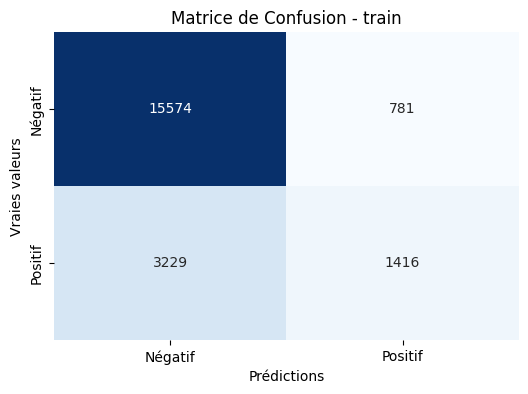

AUC: 0.76


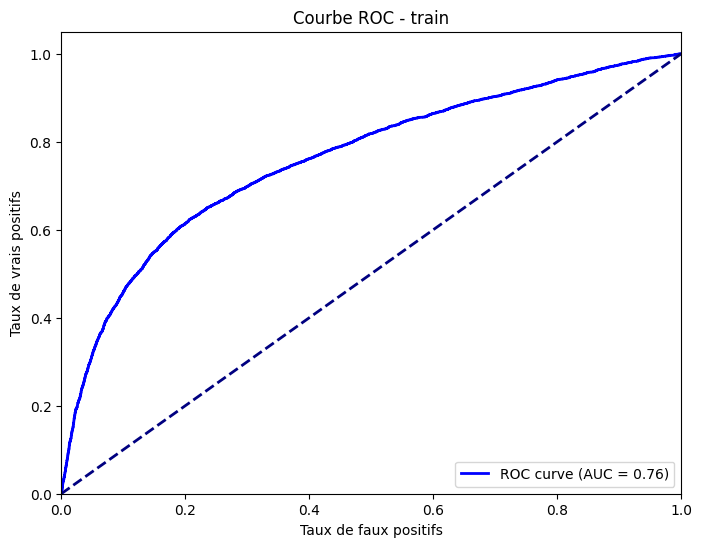

In [26]:
# Évaluer les performances sur l'ensemble d'entraînement
evaluer_performance(y_train, y_train_pred, set_name="train")

Métriques sur l'ensemble test:
Accuracy: 0.80, Precision: 0.63, Recall: 0.29, F1: 0.39

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                    6666                     343
Positif (1)                    1419                     572


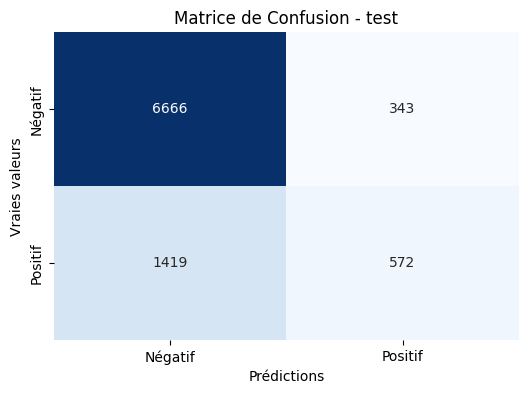

AUC: 0.75


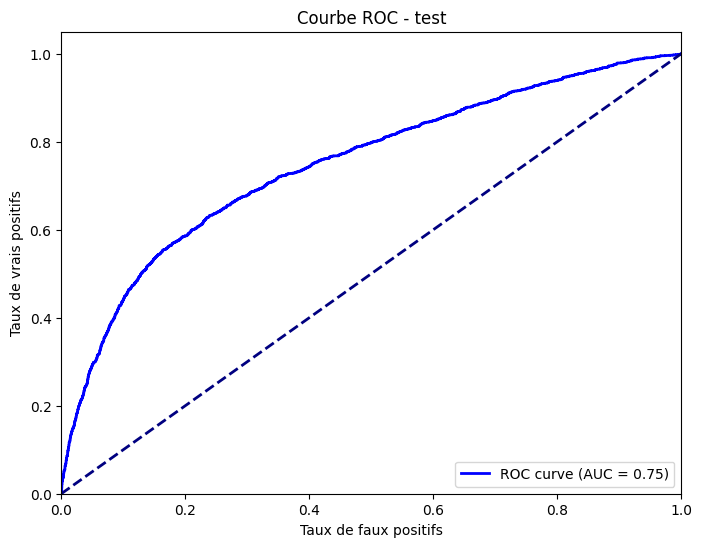

In [27]:
# Évaluer les performances sur l'ensemble de test
evaluer_performance(y_test, y_test_pred, set_name="test")

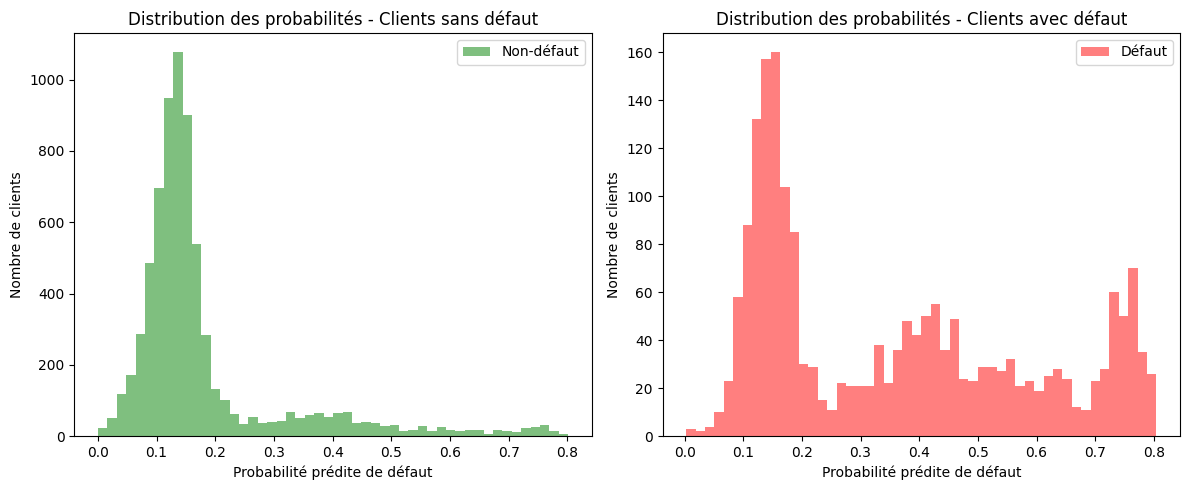

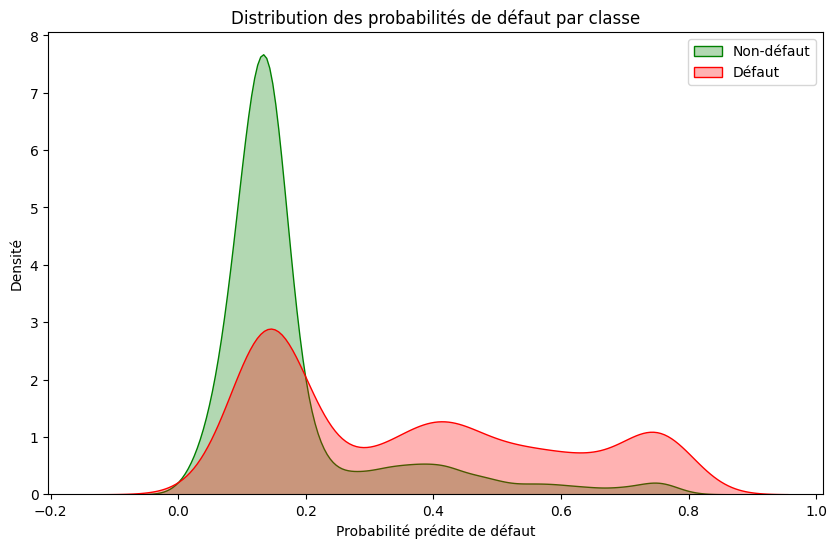

In [28]:
# Créer deux distributions séparées pour les défauts et non-défauts
plt.figure(figsize=(12, 5))

# Distribution des probabilités prédites pour les non-défauts (y=0)
plt.subplot(1, 2, 1)
plt.hist(y_test_pred[y_test == 0], bins=50, alpha=0.5, color='green', label='Non-défaut')
plt.xlabel('Probabilité prédite de défaut')
plt.ylabel('Nombre de clients')
plt.title('Distribution des probabilités - Clients sans défaut')
plt.legend()

# Distribution des probabilités prédites pour les défauts (y=1)
plt.subplot(1, 2, 2)
plt.hist(y_test_pred[y_test == 1], bins=50, alpha=0.5, color='red', label='Défaut')
plt.xlabel('Probabilité prédite de défaut')
plt.ylabel('Nombre de clients')
plt.title('Distribution des probabilités - Clients avec défaut')
plt.legend()

plt.tight_layout()
plt.show()
# Tracer les courbes de densité de probabilité sur le même graphique
plt.figure(figsize=(10, 6))

# Densité pour les non-défauts (y=0)
sns.kdeplot(data=y_test_pred[y_test == 0], color='green', label='Non-défaut', fill=True, alpha=0.3)

# Densité pour les défauts (y=1)
sns.kdeplot(data=y_test_pred[y_test == 1], color='red', label='Défaut', fill=True, alpha=0.3)

plt.xlabel('Probabilité prédite de défaut')
plt.ylabel('Densité')
plt.title('Distribution des probabilités de défaut par classe')
plt.legend()
plt.show()